In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
foodprice = pd.read_csv('kazakhstan-food-prices-1.csv')

In [5]:
foodprice.head(3)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2005-11-15,Milk - Retail,L,milk and dairy,58.0,KZT,Kazakhstan,Akmolinskaya,1714,Nur-Sultan,2622.0,81,15.0,15.0,3,2622_81_15_15,NaN
2,2005-12-15,Milk - Retail,L,milk and dairy,61.0,KZT,Kazakhstan,Akmolinskaya,1714,Nur-Sultan,2622.0,81,15.0,15.0,3,2622_81_15_15,NaN


In [102]:
#create a copy and filter only Aktau
foodprice_copy = foodprice.copy()
aktau = foodprice_copy.loc[foodprice_copy['admname'] == 'Mangistauskaya']

In [103]:
aktau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 1586 to 2240
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      655 non-null    object 
 1   cmname    655 non-null    object 
 2   unit      655 non-null    object 
 3   category  655 non-null    object 
 4   price     655 non-null    object 
 5   currency  655 non-null    object 
 6   country   655 non-null    object 
 7   admname   655 non-null    object 
 8   adm1id    655 non-null    object 
 9   mktname   655 non-null    object 
 10  mktid     655 non-null    float64
 11  cmid      655 non-null    object 
 12  ptid      655 non-null    float64
 13  umid      655 non-null    float64
 14  catid     655 non-null    object 
 15  sn        655 non-null    object 
 16  default   0 non-null      float64
dtypes: float64(4), object(13)
memory usage: 92.1+ KB


In [104]:
#changing data type to string
aktau['category'] = aktau['category'].astype('string')
#changing data type from object to integer
aktau['price'] = aktau['price'].astype('float64')
aktau['price'] = aktau['price'].astype('int64')
#changing type from object to datetime
aktau["date"] = pd.to_datetime(aktau["date"], format='%Y/%m/%d')

C:\Users\Massan\AppData\Local\Temp\ipykernel_20404\3048362526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aktau['category'] = aktau['category'].astype('string')


In [108]:
#display first 3 rows of the data 
aktau.head(3)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1586,2005-11-15,Potatoes - Retail,KG,cereals and tubers,55,KZT,Kazakhstan,Mangistauskaya,1724,Aktau,2624.0,83,15.0,5.0,1,2624_83_15_5,NaN
1587,2005-12-15,Potatoes - Retail,KG,cereals and tubers,55,KZT,Kazakhstan,Mangistauskaya,1724,Aktau,2624.0,83,15.0,5.0,1,2624_83_15_5,NaN
1588,2006-01-15,Potatoes - Retail,KG,cereals and tubers,60,KZT,Kazakhstan,Mangistauskaya,1724,Aktau,2624.0,83,15.0,5.0,1,2624_83_15_5,NaN


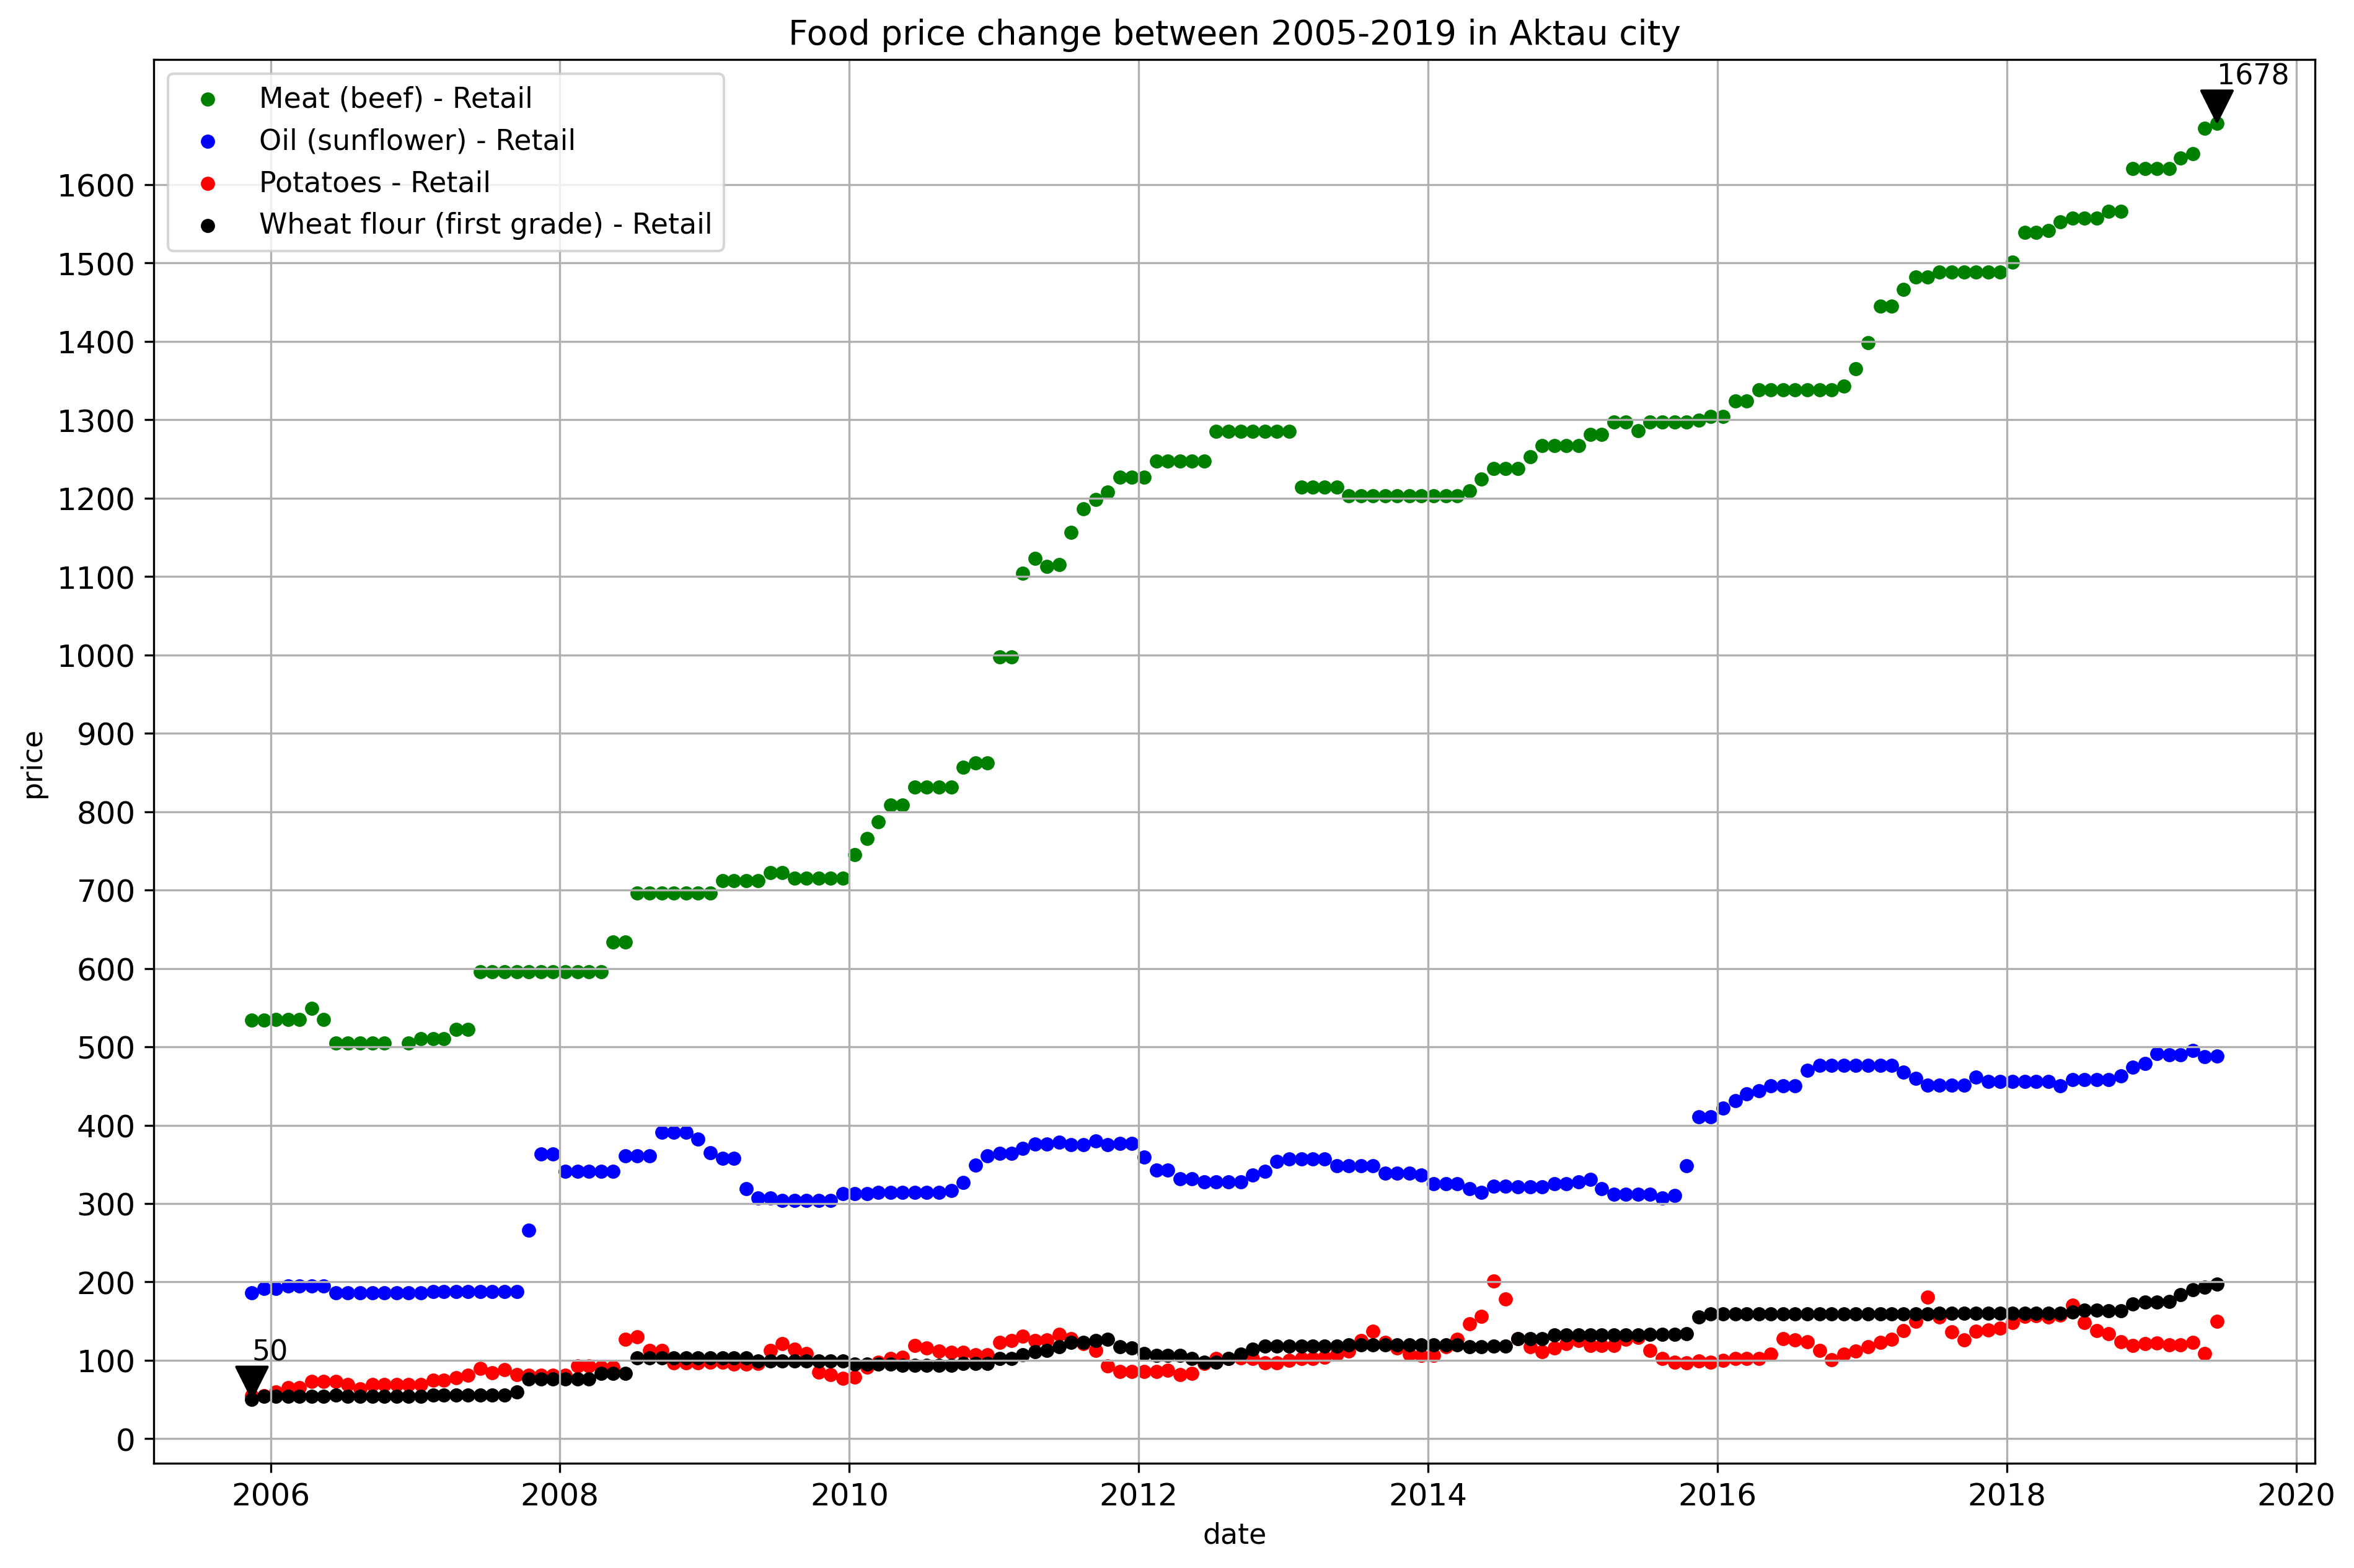

In [298]:
#plot grouped scatter plot with different colour for every category
fig, ax = plt.subplots(figsize=(15, 10))
#fig = plt.figure(figsize=(9, 11))

colors = {'Meat (beef) - Retail':'green', 'Oil (sunflower) - Retail':'blue', 'Potatoes - Retail':'red', 'Wheat flour (first grade) - Retail':'black'}
grouped = aktau.groupby('cmname')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="date", y='price', label=key, color=colors[key])

#min and max points
ymax = max(y)
xmax = max(x)
ax.annotate(ymax, xy=(xmax, ymax), xytext=(xmax, ymax+50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ymin = min(y)
xmin = min(x)
ax.annotate(ymin, xy=(xmin, ymin), xytext=(xmin, ymin+50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
#font size
plt.rcParams.update({'font.size': 11})
#plt.rc('xtick', labelsize=12) 
#plt.rc('ytick', labelsize=12) 

#ax.legend(['Сиыр еті', 'Күнбағыс майы', 'Картоп', 'Бидай ұны (1-дәрежелі)'])
ax.set_yticks(np.arange(0, 1700, 100))
plt.grid(True)
plt.title("Food price change between 2005-2019 in Aktau city")
#plt.ylabel("Баға, теңге/кг,л")
#plt.xlabel("Мерзім, жыл")
plt.savefig('aktaufoodprice.pdf', format="pdf")
plt.show()

